# Data Exploration and Preparation: SPAM E-mail Database Analysis


### This project aims to perform an exploratory data analysis (EDA) and dimensionality reduction using Principal Component Analysis (PCA) on the SPAM E-mail Database dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv("spambase.csv",na_values=['???','none'])

In [4]:
print('Data shape:', data.shape)


Data shape: (4601, 59)


In [5]:
data.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4600 non-null   float64
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [7]:
data.describe()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4600.000000,4601.000000,4586.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.104553,0.213015,0.281023,0.065453,0.312291,0.095922,0.114208,0.105639,0.090067,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,1328.338624,0.305358,1.290575,0.504370,1.395454,0.672570,0.273850,0.391441,0.401682,0.278616,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,3450.000000,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4600.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [8]:
data.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   1
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   1
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   1
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [9]:
data = data.drop_duplicates().reset_index(drop=True)
print('After dropping duplicates:', data.shape)

After dropping duplicates: (4601, 59)


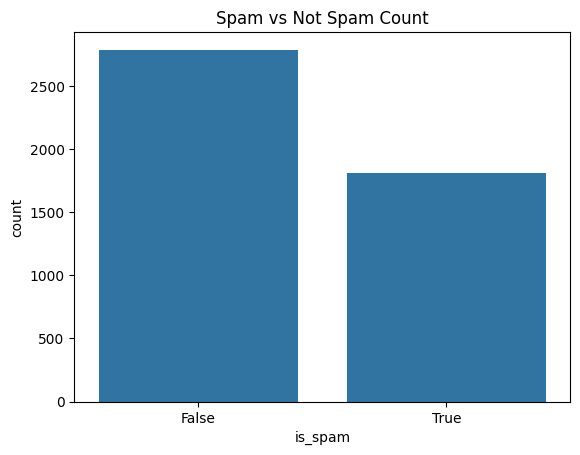

In [10]:
data['is_spam'].value_counts()
sns.countplot(data=data, x='is_spam')
plt.title("Spam vs Not Spam Count")
plt.show()

# Data Preparation/Cleaning 

In [11]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [12]:

obj_cols = data.select_dtypes(include=['object']).columns.tolist()
print('Object columns:', obj_cols)
for c in obj_cols:
    data[c] = data[c].astype(str).str.strip().replace({'nan': None})


Object columns: ['word_freq_labs']


In [13]:
for c in list(obj_cols):
    vals = data[c].dropna().unique()
    # normalize values to lowercase strings for checking
    lower_vals = set([str(v).lower() for v in vals])
    if lower_vals and lower_vals.issubset({'yes','no','true','false','y','n','t','f'}):
        data[c] = data[c].str.lower().map({'yes':1,'y':1,'true':1,'t':1,'no':0,'n':0,'false':0,'f':0})


In [14]:
# For any remaining object columns, attempt numeric conversion (non-convertible -> NaN)
for c in data.select_dtypes(include=['object']).columns:
    data[c] = pd.to_numeric(data[c], errors='coerce')

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if data[c].isnull().any():
        med = data[c].median()
        data[c] = data[c].fillna(med)


In [15]:
if 'is_spam' in data.columns:
    data['is_spam'] = pd.to_numeric(data['is_spam'], errors='coerce').fillna(0).astype(int)
else:
    print("Warning: 'is_spam' column not found in dataset.")

clean_data = data.copy()
print('Cleaned shape:', clean_data.shape)
clean_data.head()


Cleaned shape: (4601, 59)


,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<Axes: >

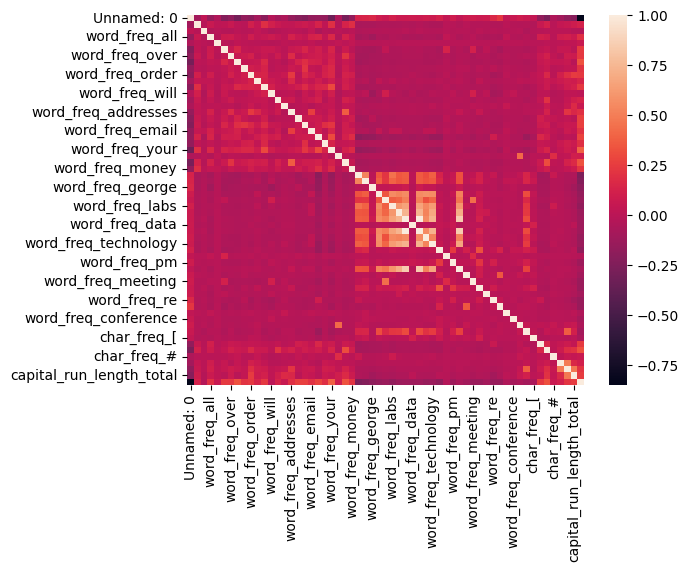

In [16]:
sns.heatmap(clean_data.corr())

Exploratory Data Analysis (EDA) and Visualizations


Exploratory Data Analysis is performed to understand the distribution of the target variable and the relationship between features.


In [17]:
X = clean_data.drop('is_spam', axis=1)
y = clean_data['is_spam'].astype(int)


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



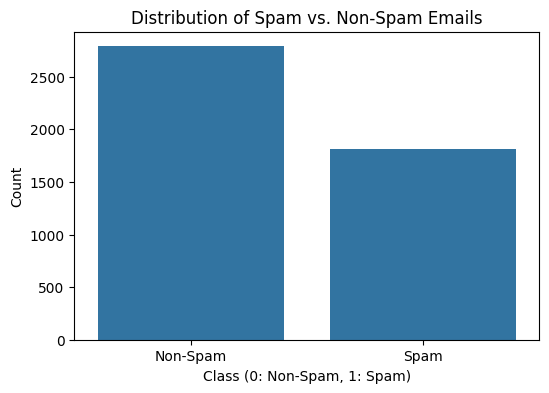

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


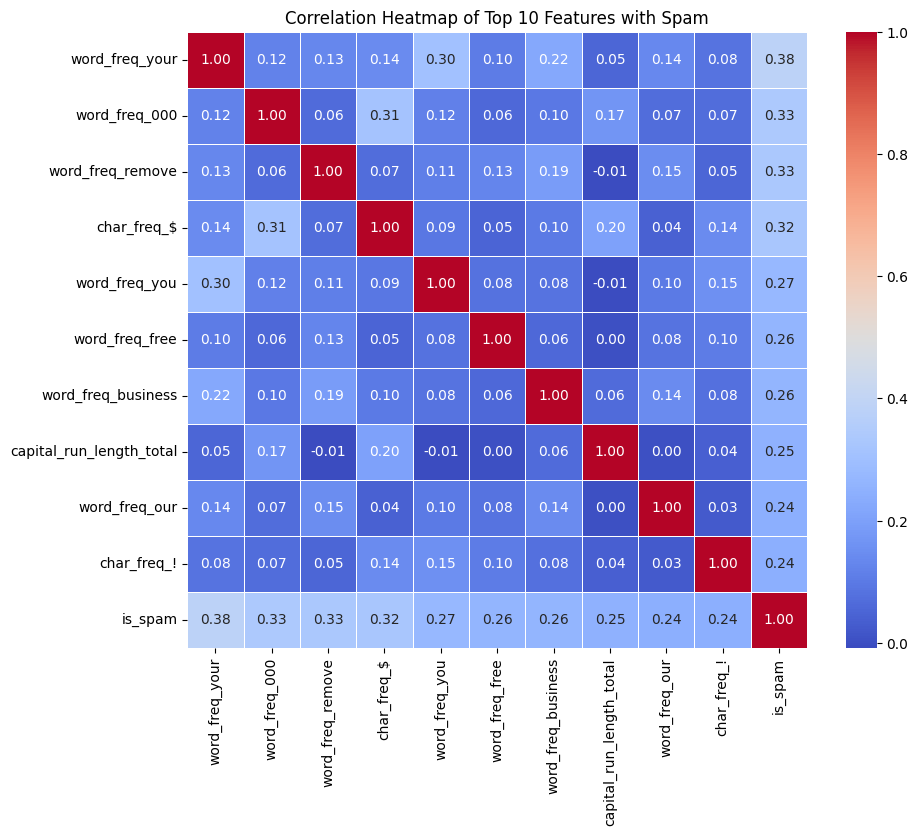

In [20]:
corr_matrix = clean_data.corr()
spam_corr = corr_matrix['is_spam'].sort_values(ascending=False)
top_10_features = spam_corr[1:11].index.tolist()

# Plot heatmap of top correlated features
features_for_heatmap = top_10_features + ['is_spam']
corr_subset = clean_data[features_for_heatmap].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Top 10 Features with Spam')
plt.show()


In [21]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

variance_threshold = 0.995
n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1

print(f"Number of components to retain {variance_threshold*100}% variance: {n_components}")

Number of components to retain 99.5% variance: 56


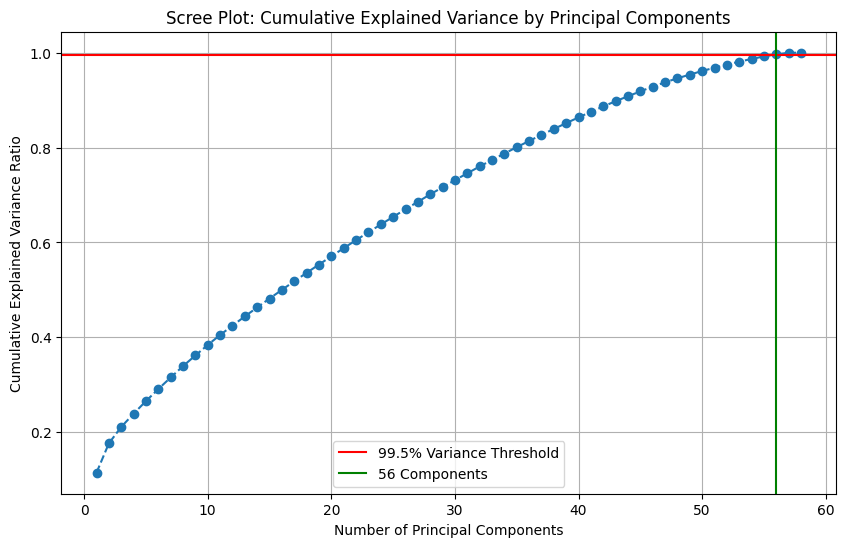

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=variance_threshold, color='r', linestyle='-', label=f'{variance_threshold*100}% Variance Threshold')
plt.axvline(x=n_components, color='g', linestyle='-', label=f'{n_components} Components')
plt.title('Scree Plot: Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()
